In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('BBDD_Hospitalización.xlsx')
df.head()

/opt/homebrew/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

In [4]:
# Aplicamos un dropna para contar con datos equitativos.
# Reseteamos índice
df.dropna(inplace=True)
df.reset_index(drop=True)
df

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,57.0,NO,NO,4.8,NO,NO,OTROS,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
561,75.0,NO,NO,75.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 8,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
562,78.0,NO,NO,9.3,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
563,67.0,NO,NO,6.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


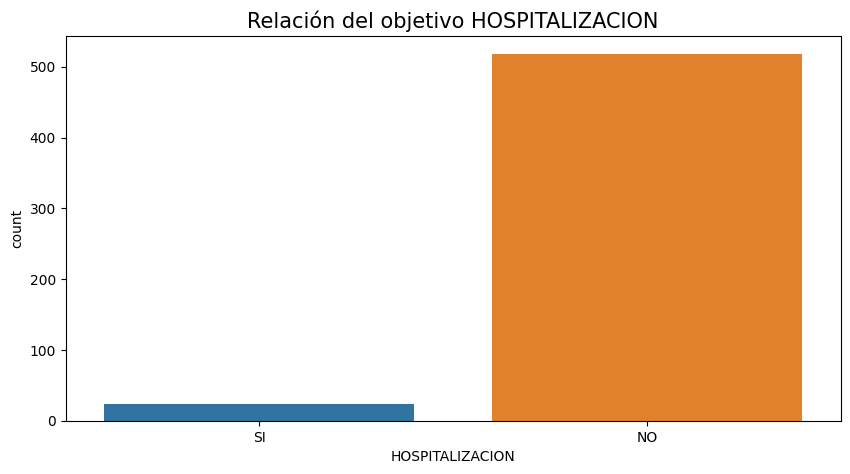

In [5]:
# Contamos la variable objetivo, para conocer su distribución a lo largo del dataset
plt.figure(figsize=(10,5))
sns.countplot(x = 'HOSPITALIZACION', label = 'Count', data = df)
plt.title('Relación del objetivo HOSPITALIZACION', fontsize=15)
plt.show()

In [6]:
# Vemos que la relacion entre el No y el Si hay una gran diferencia.
# Realizamos un describe para los valores numericos.
df.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,541.000000,541.000000,541.000000,541.000000,541.000000
mean,63.879852,13.391257,12.987061,0.168207,0.014787
std,9.389434,15.946475,3.942858,0.973437,0.201300
min,39.000000,0.600000,4.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,12.000000,3.000000


/var/folders/1y/p14x729x77z3ykk1y391m39c0000gn/T/ipykernel_5231/3257441427.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid(shape=(1,3), loc=(0,0))


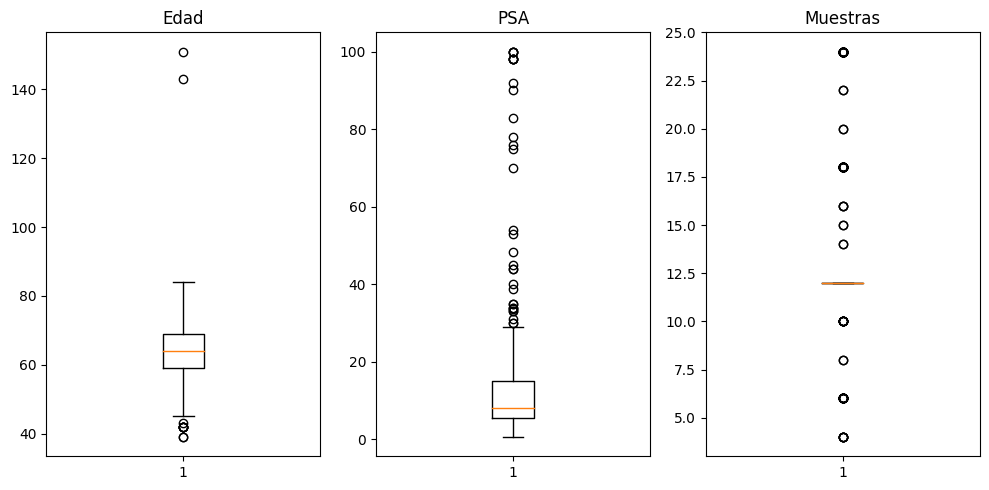

In [7]:
# No tomamos dias de hospitalizacion ya que post resultado del objetivo
columnas_Num = ['EDAD', 'PSA', 'NUMERO DE MUESTRAS TOMADAS']

fig, ax = plt.subplots(figsize=(10,5))

ax1 = plt.subplot2grid(shape=(1,3), loc=(0,0))
ax2 = plt.subplot2grid(shape=(1,3), loc=(0,1))
ax3 = plt.subplot2grid(shape=(1,3), loc=(0,2))

ax1.boxplot(df['EDAD'])
ax1.set_title('Edad')

ax2.boxplot(df['PSA'])
ax2.set_title('PSA')

ax3.boxplot(df['NUMERO DE MUESTRAS TOMADAS'])
ax3.set_title('Muestras')

plt.tight_layout()
plt.show()

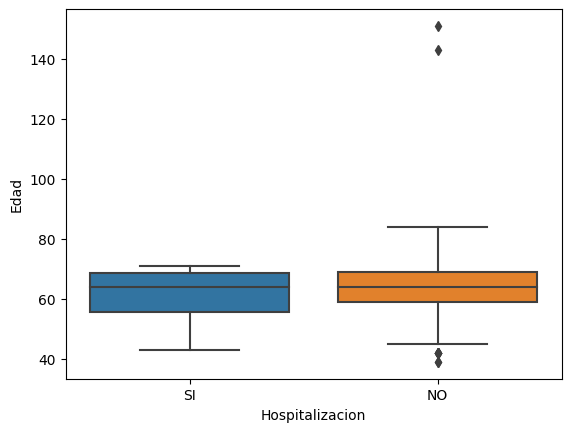

In [8]:
sns.boxplot(x='HOSPITALIZACION', y='EDAD', data=df)
plt.xlabel('Hospitalizacion')
plt.ylabel('Edad')
plt.show()

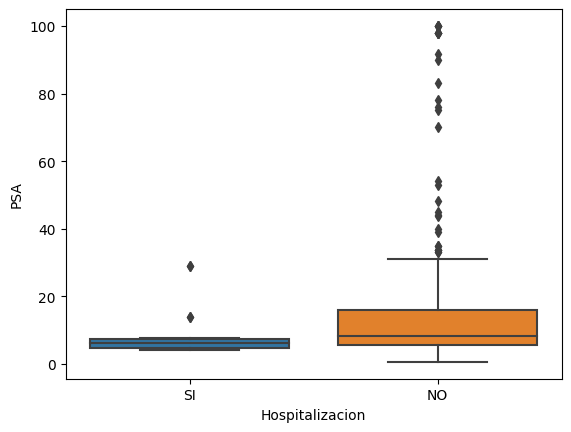

In [9]:
sns.boxplot(x='HOSPITALIZACION', y='PSA', data=df)
plt.xlabel('Hospitalizacion')
plt.ylabel('PSA')
plt.show()

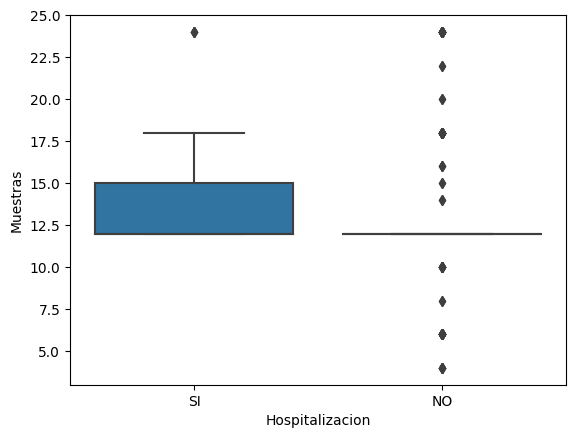

In [10]:
sns.boxplot(x='HOSPITALIZACION', y='NUMERO DE MUESTRAS TOMADAS', data=df)
plt.xlabel('Hospitalizacion')
plt.ylabel('Muestras')
plt.show()

In [11]:
# La mayoria de outliers estan relacionados el No de Hospitalizacion
# Reducimos el dataset, eliminando los outliers.
# Mejoramos balance entre el Si y el No
columnas_Num
for i in columnas_Num:
    Q1 = np.percentile(df[i],25)
    Q3 = np.percentile(df[i],75)
    IQR = Q3 - Q1
    rangoInf =  Q1 - 1.5*IQR
    rangoSup = Q3 + 1.5*IQR
    print(f'Rango sin outliers de {i} {rangoInf} - {rangoSup}')


Rango sin outliers de EDAD 44.0 - 84.0
Rango sin outliers de PSA -8.500000000000002 - 29.1
Rango sin outliers de NUMERO DE MUESTRAS TOMADAS 12.0 - 12.0


In [12]:
# Filtramos y almacenamos el dataset con respecto a los rangos sin outliers.
# Este dataset es para personas cuyo rango de edad será de 44 a 84 años.

df = df[((df['EDAD'] >= 44) & (df['EDAD'] <= 84)) & (df['PSA'] <= 29.1) & (df['NUMERO DE MUESTRAS TOMADAS'] == 12)]
df.reset_index(drop=True, inplace=True)
df

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
3,55.0,SI,SI,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,NO,NO,NO,NO,NO,SI,3.0,0.0
4,53.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,SI,UROCULTIVO,E.COLI,"RESISTENTE A AMPI, CIPRO Y GENTA",SI,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,70.0,SI,NO,18.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
380,57.0,NO,NO,4.8,NO,NO,OTROS,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
381,78.0,NO,NO,9.3,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
382,67.0,NO,NO,6.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


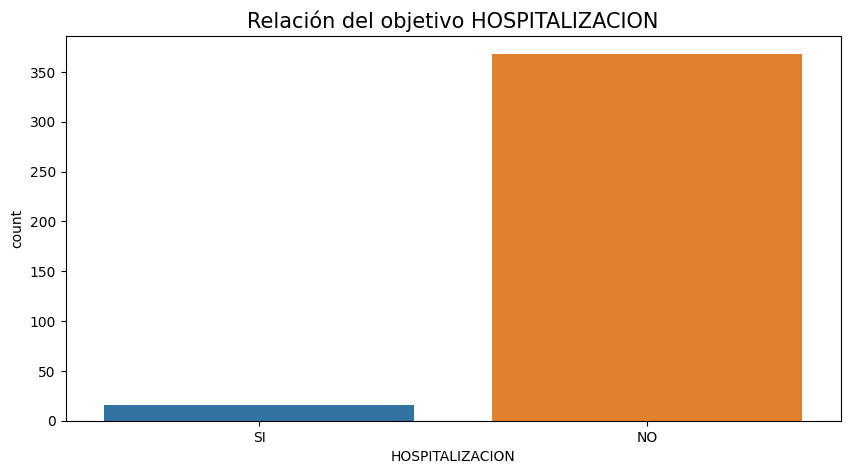

In [13]:
# Visualicemos el balance de la variable objetivo
plt.figure(figsize=(10,5))
sns.countplot(x = 'HOSPITALIZACION', label = 'Count', data = df)
plt.title('Relación del objetivo HOSPITALIZACION', fontsize=15)
plt.show()

In [14]:
# Analicemos las varibales categoricas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       384 non-null    float64
 1   DIABETES                                                                   384 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 384 non-null    object 
 3   PSA                                                                        384 non-null    float64
 4   BIOPSIAS PREVIAS                                                           384 non-null    object 
 5   VOLUMEN PROSTATICO                                                         384 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

In [15]:
# Analicemos las varibales categoricas
def imprimir_valoresUnicos(dataframe, columnas_seleccionadas):
    for indice in columnas_seleccionadas:
        if 0 <= indice < len(dataframe.columns):
            nombre_columna = dataframe.columns[indice]
            valores_unicos = dataframe[nombre_columna].unique()
            print(f'Valores únicos en la columna de {indice}, {nombre_columna}: {valores_unicos}')
        else:
            print(f'Índice de columna {indice} fuera de rango.')
        
columnas_Cat = [1,2,4,5,6,8,9,10,11,12,13,14,15,16]
imprimir_valoresUnicos(df,columnas_Cat)

Valores únicos en la columna de 1, DIABETES: ['NO' 'SI']
Valores únicos en la columna de 2, HOSPITALIZACIÓN ULTIMO MES: ['NO' 'SI']
Valores únicos en la columna de 4, BIOPSIAS PREVIAS: ['NO' 'SI']
Valores únicos en la columna de 5, VOLUMEN PROSTATICO: ['SI' 'NO']
Valores únicos en la columna de 6, ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS: ['FLUOROQUINOLONA_AMINOGLICOSIDO' 'OROQUINOLONAS'
 'CEFALOSPORINA_AMINOGLUCOCIDO' 'OTROS' 'FLUOROQUINOLONA_AMINOGLICÓSIDO']
Valores únicos en la columna de 8, CUP: ['NO' 'SI']
Valores únicos en la columna de 9, ENF. CRONICA PULMONAR OBSTRUCTIVA: ['NO' 'SI, EPOC' 'SI, ASMA' 'SI']
Valores únicos en la columna de 10, BIOPSIA: ['NEG' 'ADENOCARCINOMA GLEASON 6 ' 'ADENOCARCINOMA GLEASON 6'
 'ADENOCARCINOMA GLEASON 7 ' 'ADENOCARCINOMA GLEASON 8 ' 'PROSTATITIS'
 'ADENOCARCINOMA GLEASON 9 ' 'ADENOCARCINOMA GLEASON 7'
 'HIPERPLASIA PROSTATICA']
Valores únicos en la columna de 11, NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA: [1 2 3 9

In [16]:
# Reemplazamos cierta columnas con solo Si y No
# Columna 6 no será considerada, por lo que antibiotico todos aplican.

#Columna 9
df.loc[df['ENF. CRONICA PULMONAR OBSTRUCTIVA'] == 'SI, EPOC', 'ENF. CRONICA PULMONAR OBSTRUCTIVA'] = 'SI'
df.loc[df['ENF. CRONICA PULMONAR OBSTRUCTIVA'] == 'SI, ASMA', 'ENF. CRONICA PULMONAR OBSTRUCTIVA'] = 'SI'

#Columna 10
df.loc[df['BIOPSIA'] == 'NEG', 'BIOPSIA'] = 'NO'
df.loc[df['BIOPSIA'] == 'ADENOCARCINOMA GLEASON 6 ', 'BIOPSIA'] = 'SI'
df.loc[df['BIOPSIA'] == 'ADENOCARCINOMA GLEASON 6', 'BIOPSIA'] = 'SI'
df.loc[df['BIOPSIA'] == 'ADENOCARCINOMA GLEASON 7 ', 'BIOPSIA'] = 'SI'
df.loc[df['BIOPSIA'] == 'ADENOCARCINOMA GLEASON 7', 'BIOPSIA'] = 'SI'
df.loc[df['BIOPSIA'] == 'ADENOCARCINOMA GLEASON 8 ', 'BIOPSIA'] = 'SI'
df.loc[df['BIOPSIA'] == 'ADENOCARCINOMA GLEASON 9 ', 'BIOPSIA'] = 'SI'
df.loc[df['BIOPSIA'] == 'PROSTATITIS', 'BIOPSIA'] = 'SI'
df.loc[df['BIOPSIA'] == 'HIPERPLASIA PROSTATICA', 'BIOPSIA'] = 'SI'

#Columna 11
df.loc[df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] == 1, 
       'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = 'SI'
df.loc[df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] == 2, 
       'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = 'SI'
df.loc[df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] == 3, 
       'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = 'SI'
df.loc[df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] == 9, 
       'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = 'SI'

#Columna 14
df.loc[df['TIPO DE CULTIVO'] == 'UROCULTIVO', 'TIPO DE CULTIVO' ] = 'SI'
df.loc[df['TIPO DE CULTIVO'] == 'HEMOCULTIVO Y UROCULTIVO', 'TIPO DE CULTIVO' ] = 'SI'

#Columna 15
df.loc[df['AGENTE AISLADO'] == 'E.COLI', 'AGENTE AISLADO'] = 'SI'
df.loc[df['AGENTE AISLADO'] == 'PSEUDOMONAS AERUGINOSA', 'AGENTE AISLADO'] = 'SI'

#Columna 16 
df.loc[df['PATRON DE RESISTENCIA'] == 'RESISTENTE A AMPI, CIPRO Y GENTA', 'PATRON DE RESISTENCIA' ] = 'SI'
df.loc[df['PATRON DE RESISTENCIA']== 'RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA', 
       'PATRON DE RESISTENCIA'] = 'SI'


In [17]:
# Analicemos las varibales categoricas
def imprimir_valoresUnicos(dataframe, columnas_seleccionadas):
    for indice in columnas_seleccionadas:
        if 0 <= indice < len(dataframe.columns):
            nombre_columna = dataframe.columns[indice]
            valores_unicos = dataframe[nombre_columna].unique()
            print(f'Valores únicos en la columna de {indice}, {nombre_columna}: {valores_unicos}')
        else:
            print(f'Índice de columna {indice} fuera de rango.')
        
columnas_Cat = [1,2,4,5,8,9,10,11,12,13,14,15,16]
imprimir_valoresUnicos(df,columnas_Cat)

Valores únicos en la columna de 1, DIABETES: ['NO' 'SI']
Valores únicos en la columna de 2, HOSPITALIZACIÓN ULTIMO MES: ['NO' 'SI']
Valores únicos en la columna de 4, BIOPSIAS PREVIAS: ['NO' 'SI']
Valores únicos en la columna de 5, VOLUMEN PROSTATICO: ['SI' 'NO']
Valores únicos en la columna de 8, CUP: ['NO' 'SI']
Valores únicos en la columna de 9, ENF. CRONICA PULMONAR OBSTRUCTIVA: ['NO' 'SI']
Valores únicos en la columna de 10, BIOPSIA: ['NO' 'SI']
Valores únicos en la columna de 11, NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA: ['SI' 'NO']
Valores únicos en la columna de 12, FIEBRE: ['SI' 'NO']
Valores únicos en la columna de 13, ITU: ['NO' 'SI']
Valores únicos en la columna de 14, TIPO DE CULTIVO: ['NO' 'SI']
Valores únicos en la columna de 15, AGENTE AISLADO: ['NO' 'SI']
Valores únicos en la columna de 16, PATRON DE RESISTENCIA: ['NO' 'SI']


In [18]:
colObjetivo = [17]
colConvertir = df.columns[columnas_Cat + colObjetivo]
df[colConvertir] = df[colConvertir].replace({'SI': 1, 'NO': 0})

/var/folders/1y/p14x729x77z3ykk1y391m39c0000gn/T/ipykernel_5231/3771564355.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colConvertir] = df[colConvertir].replace({'SI': 1, 'NO': 0})


In [19]:
columnas_Num = [0, 3]

In [20]:
df

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,0,0,4.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,0,0,1,1,0,0,0,0,1,2.0,0.0
1,56.0,0,0,7.7,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,0,0,1,1,0,0,0,0,1,5.0,0.0
2,56.0,0,0,7.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,0,0,1,1,0,0,0,0,1,5.0,0.0
3,55.0,1,1,4.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,0,0,1,0,0,0,0,0,1,3.0,0.0
4,53.0,0,0,7.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,0,0,1,1,1,1,1,1,1,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,70.0,1,0,18.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
380,57.0,0,0,4.8,0,0,OTROS,12.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
381,78.0,0,0,9.3,0,1,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
382,67.0,0,0,6.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,0,1,0,0,0,0,0,0,0,0.0,0.0


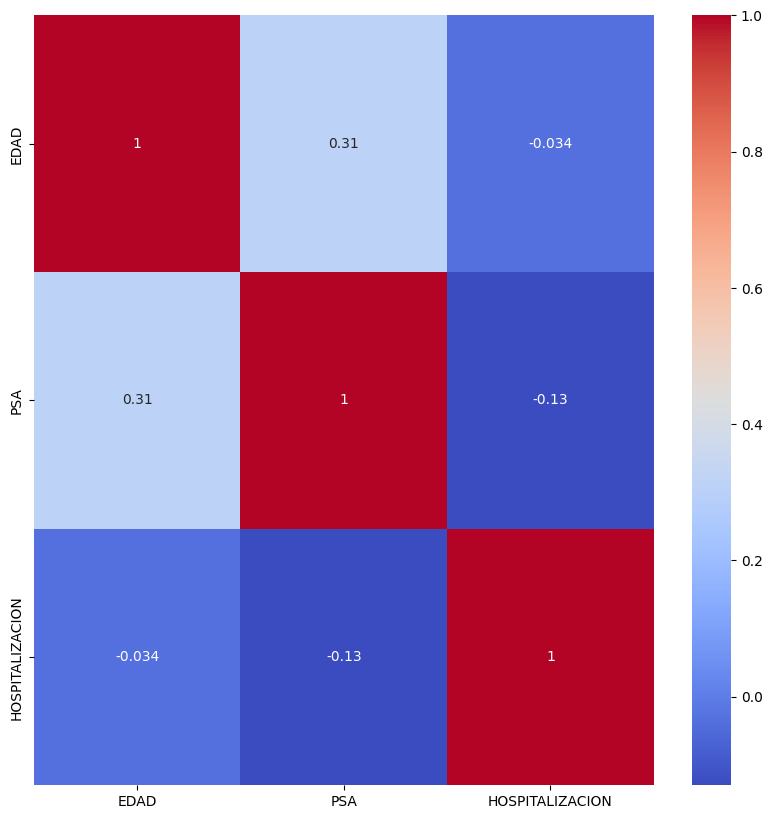

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:, columnas_Num + colObjetivo].corr(), annot=True, cmap='coolwarm')
plt.show()

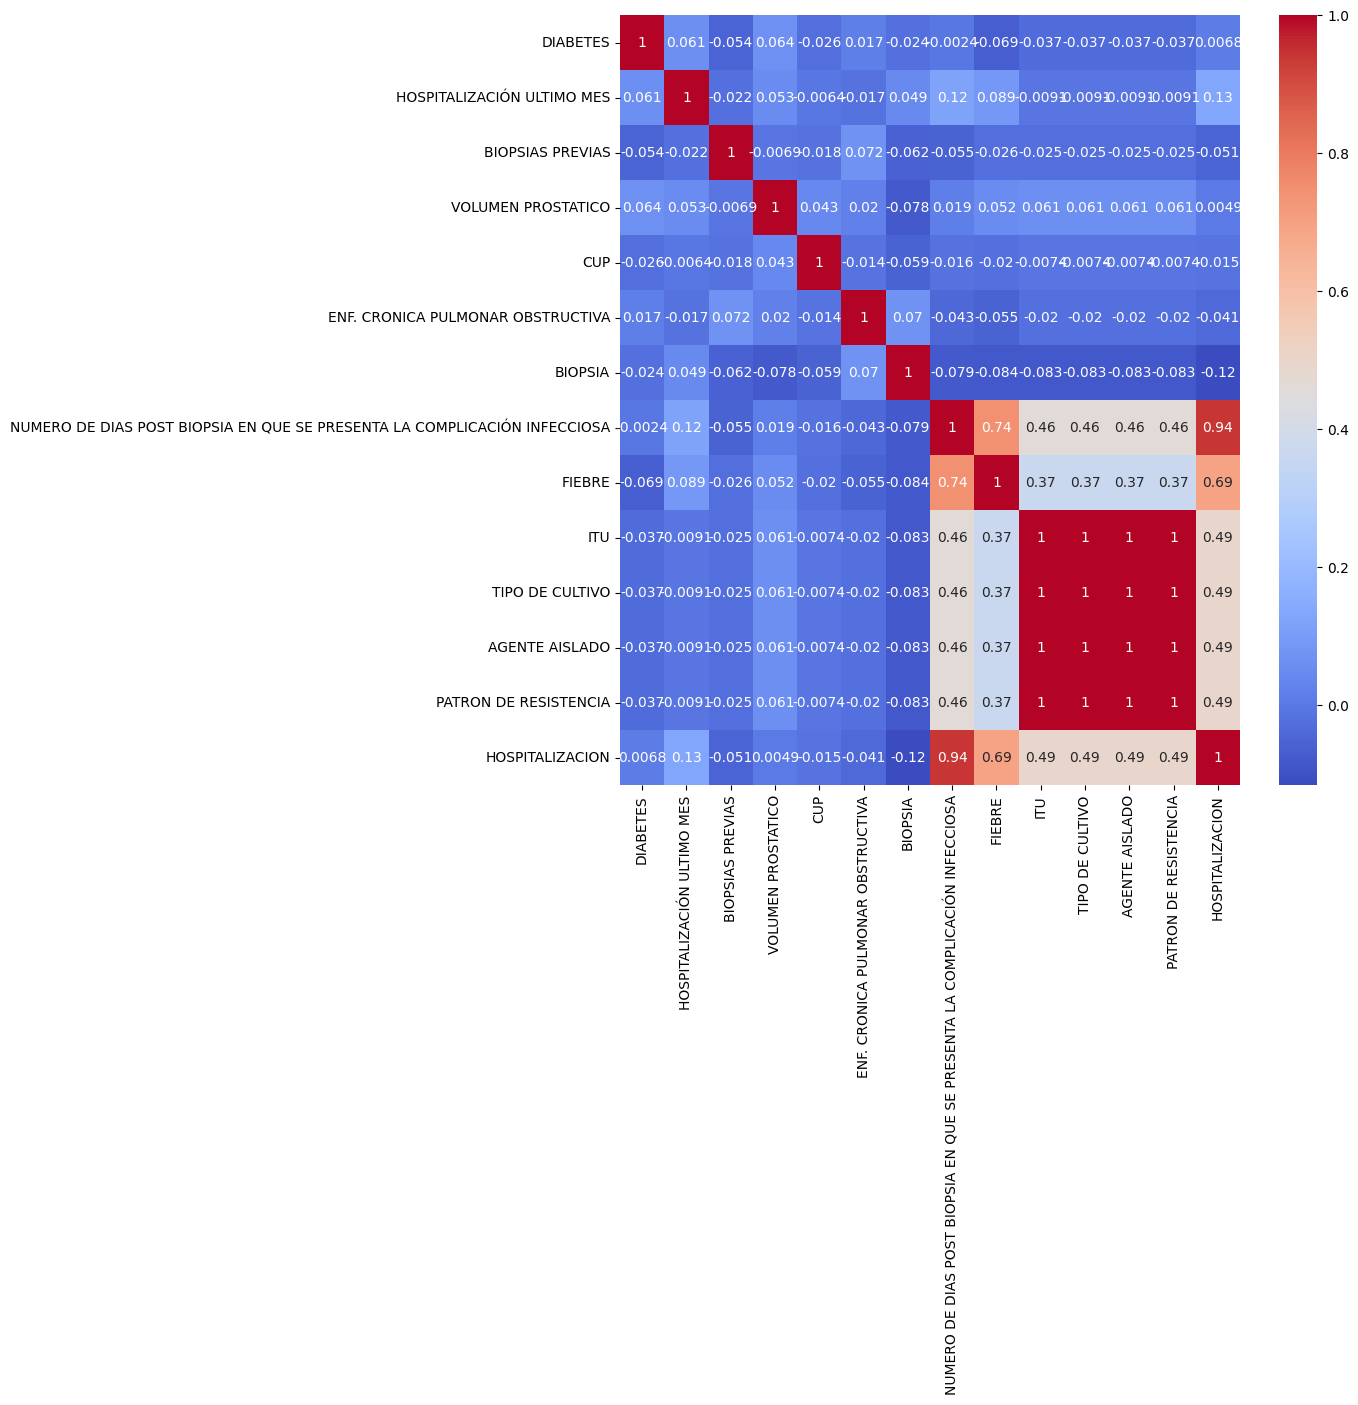

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:, columnas_Cat + colObjetivo].corr(), annot=True, cmap='coolwarm')
plt.show()

In [23]:
# Ahora vemos contamos con una fuerte ralacion con las siguientes
# columnas : 11,12,13,14,15,16 y la columnaObjetivo: 17

columnas = [11,12,13,14,15,16,17]
df = df.iloc[:, columnas]

In [24]:
df.rename(columns={'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA': 'COMPLICACION INFECCIOSA'}, inplace=True)

/var/folders/1y/p14x729x77z3ykk1y391m39c0000gn/T/ipykernel_5231/2752779861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA': 'COMPLICACION INFECCIOSA'}, inplace=True)


In [25]:
df

,COMPLICACION INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
0,1,1,0,0,0,0,1
1,1,1,0,0,0,0,1
2,1,1,0,0,0,0,1
3,1,0,0,0,0,0,1
4,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
379,0,0,0,0,0,0,0
380,0,0,0,0,0,0,0
381,0,0,0,0,0,0,0
382,0,0,0,0,0,0,0


In [26]:
# Analizamos filas cuyo valor sea 0 en todas sus columnas
filas_con_ceros = df[(df == 0).all(axis=1)]
filas_con_ceros

,COMPLICACION INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
18,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
379,0,0,0,0,0,0,0
380,0,0,0,0,0,0,0
381,0,0,0,0,0,0,0
382,0,0,0,0,0,0,0


In [27]:
# Sustraemos las filas_con_ceros
df = df[~(df == 0).all(axis=1)]
df.reset_index(drop=True, inplace=True)
df

,COMPLICACION INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
0,1,1,0,0,0,0,1
1,1,1,0,0,0,0,1
2,1,1,0,0,0,0,1
3,1,0,0,0,0,0,1
4,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1
6,1,1,0,0,0,0,1
7,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1
9,1,1,0,0,0,0,1


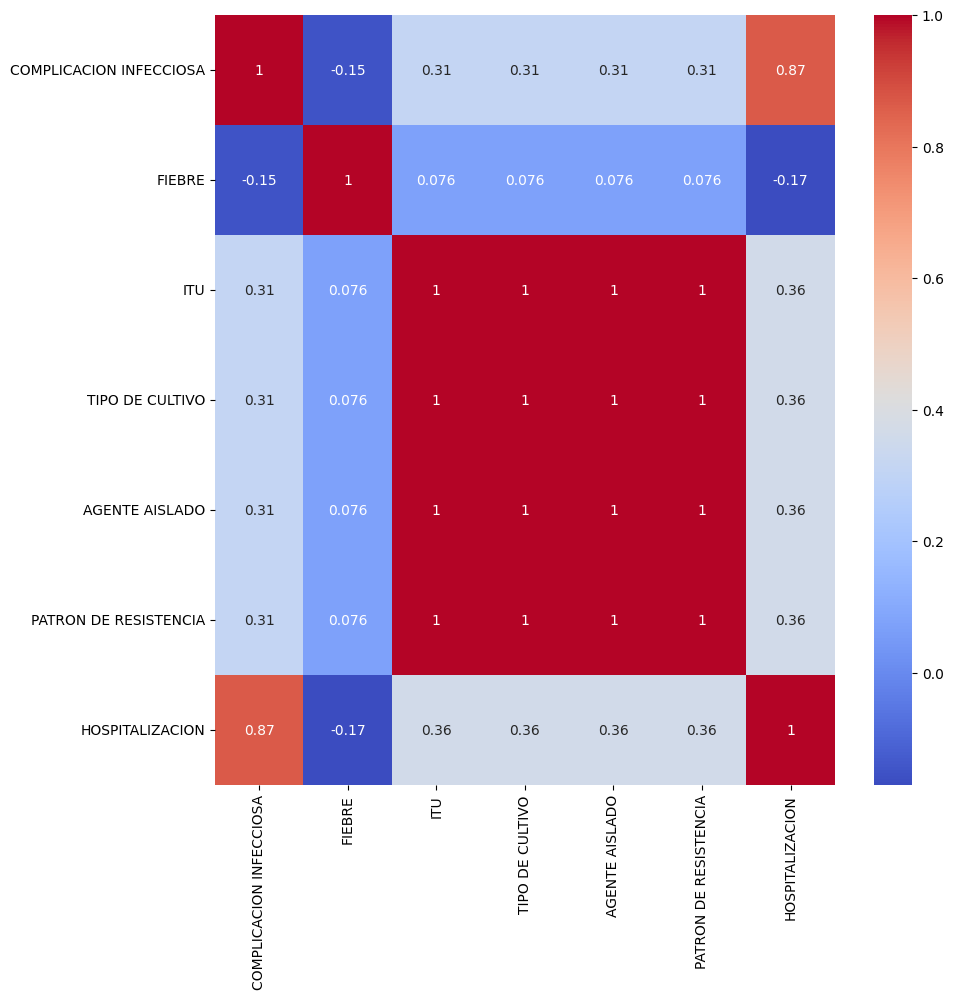

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [29]:
# Guardamos el df en archivo csv, para luego analizar y predecir con ML
df.to_csv('hospitalizacion.csv', index=False)